In [141]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

In [142]:
data = pd.read_csv('dataset/formatted_data.csv').drop('Unnamed: 0', axis=1)

In [143]:
# Selecting relevant variables for churn prediction
x_variables = ['dateCreated', 'page_turn_count', 'view_duration','InstallDate']
X = data[x_variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Using K means clustering

In [144]:
# Finding the optimal number of clusters using elbow method from Kmeans.
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\hanan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hanan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hanan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hanan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

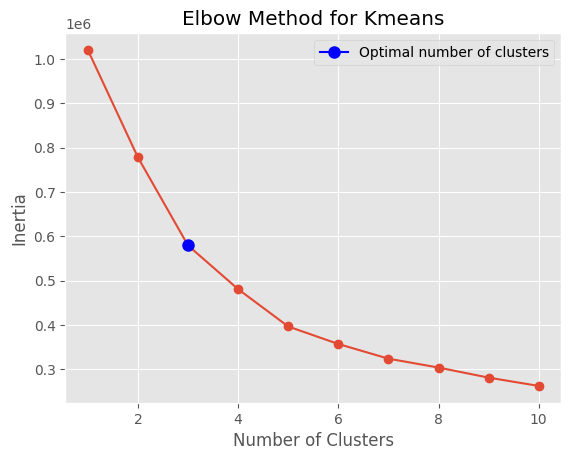

In [145]:
if os.path.isdir('plots') == False:
    os.mkdir('plots')
plt.style.use('ggplot')
plt.plot(range(1, 11), inertia, marker = 'o')
plt.plot(3, inertia[2], marker = 'o', color = 'b', markersize = 8, label = 'Optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.title('Elbow Method for Kmeans')
plt.savefig('plots/Elbow_method_for_kmeans.pdf')

In [146]:
# Based on elbow method, optimal number of clusters = 3-4
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=50)
data['churn'] = kmeans.fit_predict(X_scaled)

c:\Users\hanan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [147]:
# Kmeans sorts cluster based on ascending order, Higher churn is given higher value, therefore it needs to be inverted for better representation
inverting_values = {0: 2, 1: 1, 2: 0}               
data['churn'] = data['churn'].replace(inverting_values)

In [148]:
# Saving data with predicted churn into a .csv file
output_path = 'dataset/data_churn.csv'
data.to_csv(output_path, mode = 'a', header=not os.path.exists(output_path))		                # This will append the datafile and put headers only for the first time.)

In [149]:
# Grouping data based on churn predicted by Kmeans
df_low_risk = data[data['churn'] == 0]
df_mid_risk = data[data['churn'] == 1]
df_high_risk = data[data['churn'] == 2]

## Plots

Histograms of relevant variables

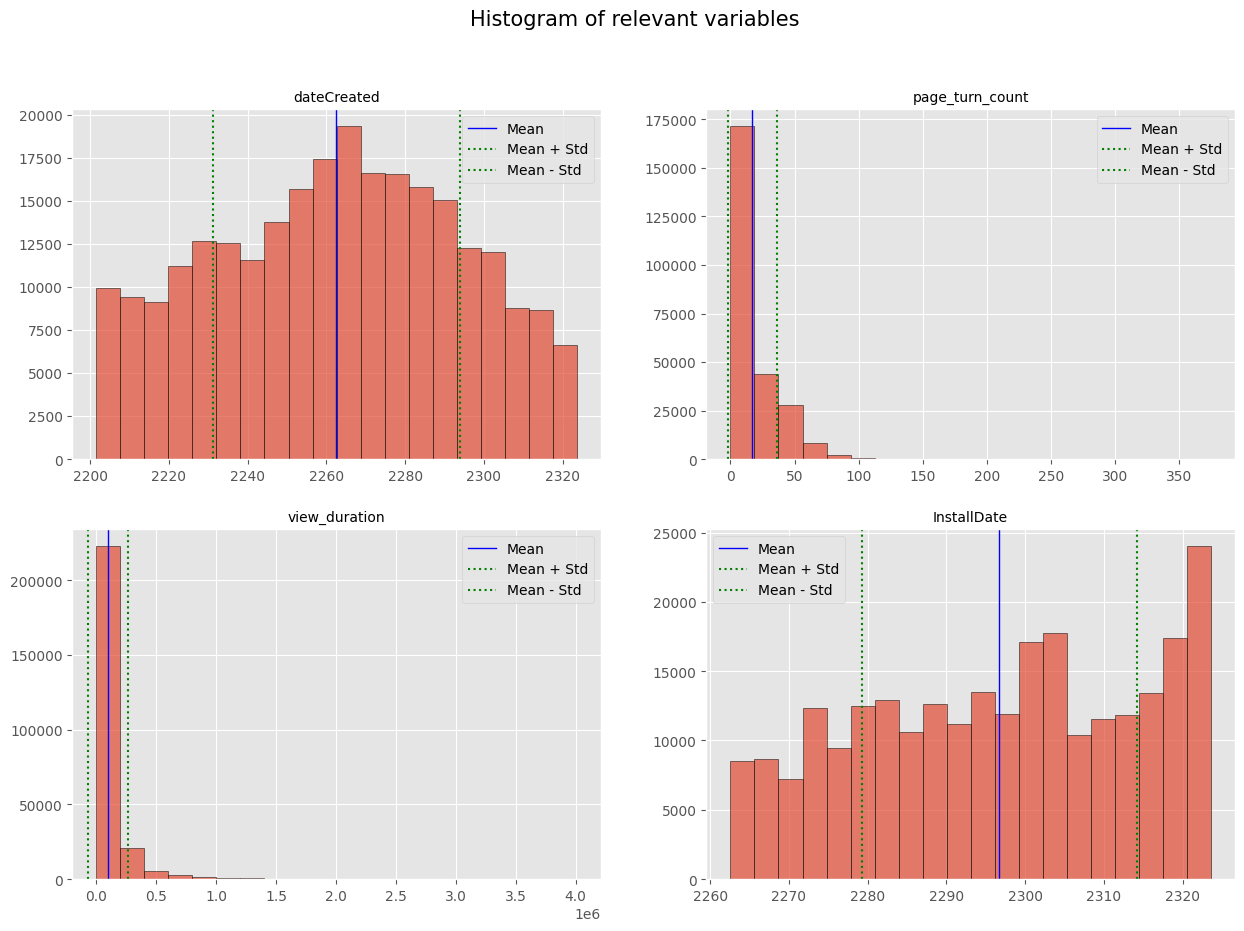

In [150]:
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
for i in range(len(x_variables)):
    plt.subplot(2,2,i+1)
    plt.hist(X[x_variables[i]], edgecolor = 'black', alpha = 0.7, bins = 20)
    # Plot mean and standard deviation as vertical lines
    plt.axvline(x=X[x_variables[i]].mean(), color='blue', linewidth=1, label='Mean')
    plt.axvline(x=X[x_variables[i]].mean() + X[x_variables[i]].std(), color='green', linestyle='dotted', linewidth=1.5, label='Mean + Std')
    plt.axvline(x=X[x_variables[i]].mean() - X[x_variables[i]].std(), color='green', linestyle='dotted', linewidth=1.5, label='Mean - Std')
    plt.legend()
    plt.title(x_variables[i],size = 10)
plt.suptitle('Histogram of relevant variables', size = 15)
plt.savefig('plots/Histograms_relevant_variables.pdf')

Histogram for predicted churn

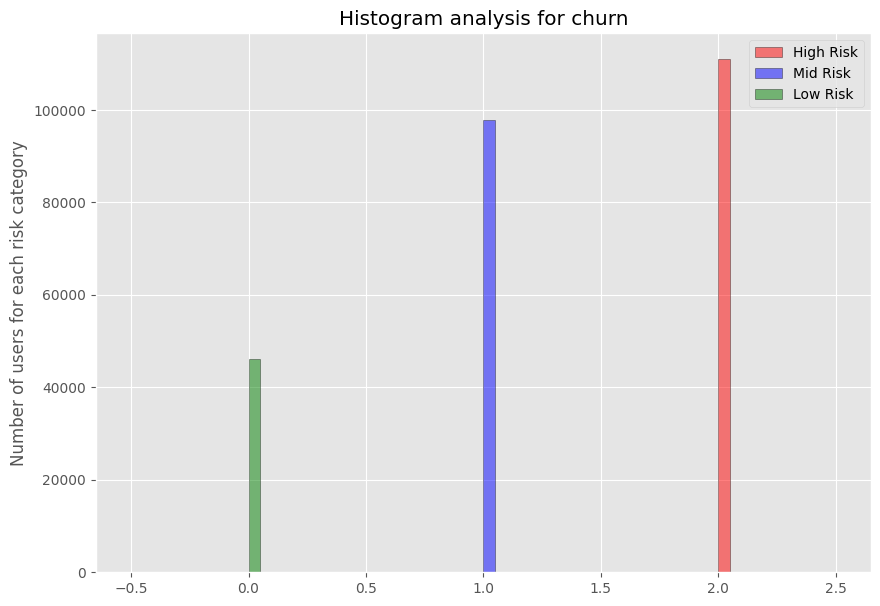

In [161]:
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.hist(df_high_risk['churn'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "High Risk", color='red')
plt.hist(df_mid_risk['churn'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "Mid Risk", color='blue')
plt.hist(df_low_risk['churn'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "Low Risk", color='green')
plt.ylabel('Number of users for each risk category')
plt.legend()
plt.title('Histogram analysis for churn')
plt.savefig('plots/Histogram_churn_count.pdf')

Histogram for date created

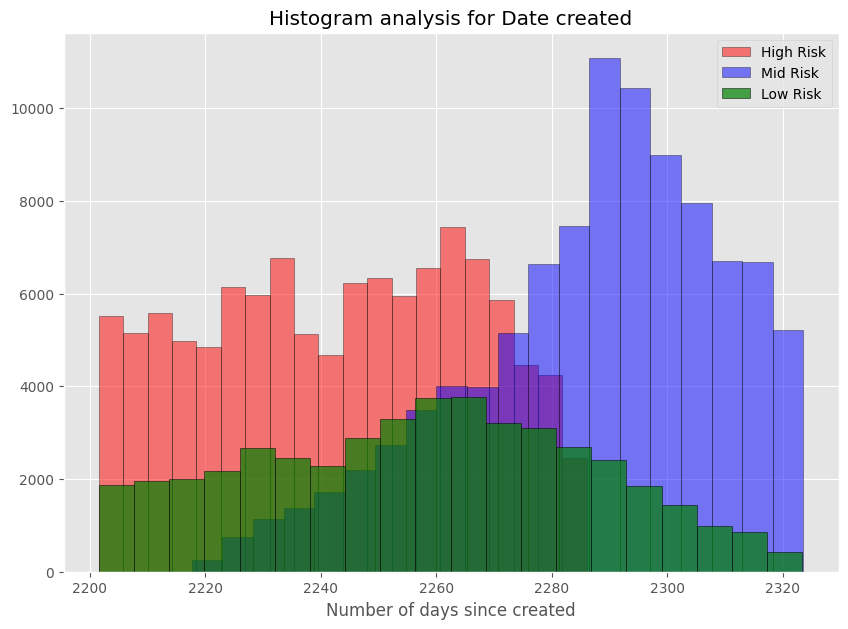

In [151]:
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.hist(df_high_risk['dateCreated'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "High Risk", color = 'red')
plt.hist(df_mid_risk['dateCreated'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "Mid Risk", color = 'blue')
plt.hist(df_low_risk['dateCreated'], edgecolor = 'black', alpha = 0.7, bins = 20, label = "Low Risk", color = 'green')
plt.xlabel('Number of days since created')
plt.legend()
plt.title('Histogram analysis for Date created')
plt.savefig('plots/Histograms_date_created.pdf')

Histogram for page turn count

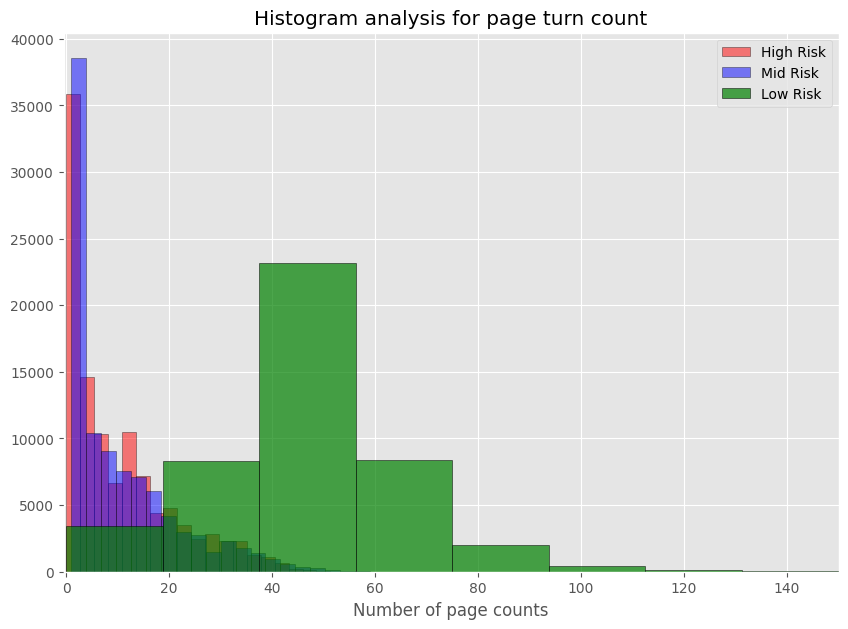

In [152]:
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.hist(df_high_risk['page_turn_count'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "High Risk", color = 'red')
plt.hist(df_mid_risk['page_turn_count'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "Mid Risk", color = 'blue')
plt.hist(df_low_risk['page_turn_count'], edgecolor = 'black', alpha = 0.7, bins = 20, label = "Low Risk", color = 'green')
plt.xlabel('Number of page counts')
plt.legend()
plt.xlim(-0.5,150)
plt.title('Histogram analysis for page turn count')
plt.savefig('plots/Histograms_page_turn_count.pdf')

Histogram for view duration

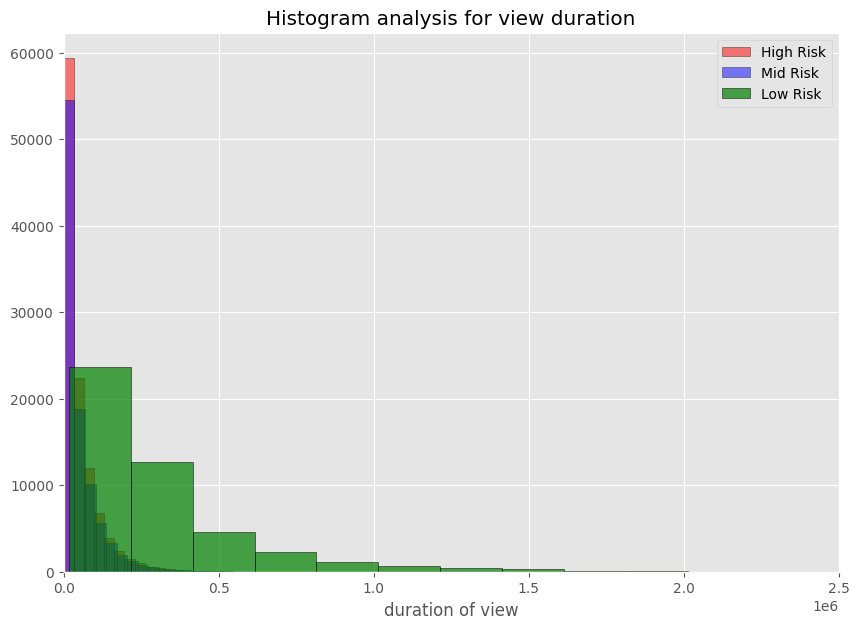

In [162]:
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.hist(df_high_risk['view_duration'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "High Risk", color = 'red')
plt.hist(df_mid_risk['view_duration'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "Mid Risk", color = 'blue')
plt.hist(df_low_risk['view_duration'], edgecolor = 'black', alpha = 0.7, bins = 20, label = "Low Risk", color = 'green')

plt.xlabel('duration of view')
plt.legend()
plt.xlim(-10,2.5e6)
plt.title('Histogram analysis for view duration')
plt.savefig('plots/Histograms_view_duration.pdf')

Histogram for Install date

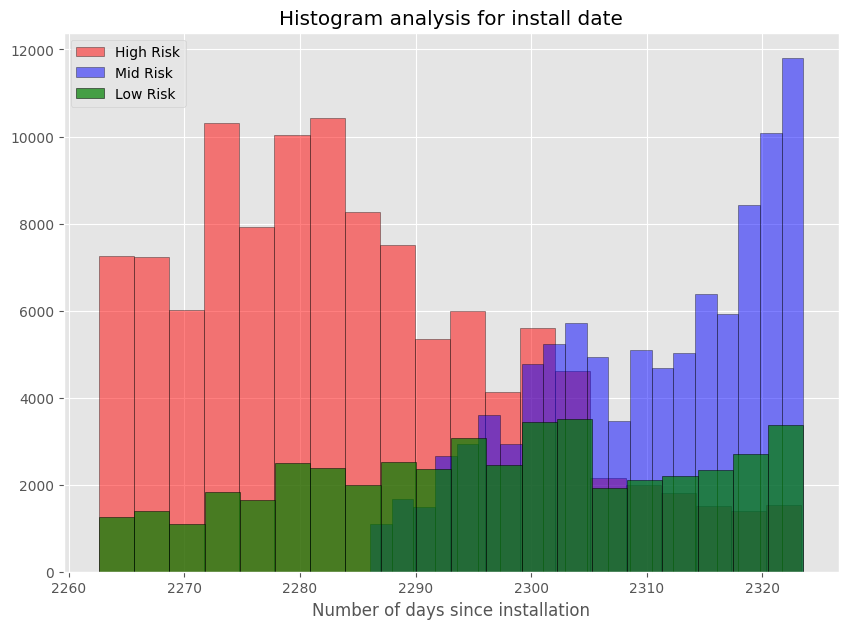

In [163]:
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.hist(df_high_risk['InstallDate'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "High Risk", color = 'red')
plt.hist(df_mid_risk['InstallDate'], edgecolor = 'black', alpha = 0.5, bins = 20, label = "Mid Risk", color = 'blue')
plt.hist(df_low_risk['InstallDate'], edgecolor = 'black', alpha = 0.7, bins = 20, label = "Low Risk", color = 'green')
plt.xlabel('Number of days since installation')
plt.legend()
# plt.xlim(-10,2.5e6)
plt.title('Histogram analysis for install date')
plt.savefig('plots/Histograms_install_date.pdf')